In [605]:
import numpy as np
import pandas as pd

In [606]:
train = np.load ('train.npy')
test = np.load ('test.npy')

In [607]:
train = train[6] #train[0] = train1
test = test[6] #test[0] = test1
#Mejor el 6

In [608]:
x_train = pd.DataFrame(train)
x_test = pd.DataFrame(test)
y_train = np.array(["carton"]*int(train.shape[0]/3) +  ["plastico"]*int(train.shape[0]/3) +  ["cristal"]*int(train.shape[0]/3))
y_test = np.array(["carton"]*int(test.shape[0]/3) +  ["plastico"]*int(test.shape[0]/3) +  ["cristal"]*int(test.shape[0]/3))

In [609]:
from sklearn.ensemble import RandomForestClassifier

In [610]:
modelo = RandomForestClassifier(n_estimators=14, max_depth=5, random_state=0)
modelo.fit(x_train,y_train)
y_prds = modelo.predict(x_test)

In [611]:
comp = pd.DataFrame({'real' : y_test , 'preds' : y_prds })
comp.to_excel(r'comp.xlsx', index = False)
comp

,real,preds
0,carton,plastico
1,carton,carton
2,carton,cristal
3,carton,carton
4,carton,carton
5,carton,plastico
6,carton,plastico
7,carton,plastico
8,carton,carton
9,carton,carton


In [612]:
from sklearn.metrics import accuracy_score

In [613]:
accuracy = accuracy_score(y_test, y_prds)
accuracy

0.8

In [614]:
from sklearn.metrics import confusion_matrix

In [615]:
cm = confusion_matrix(y_test, y_prds)
cm #[carton, cristal, plastico]

array([[ 5,  1,  4],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

In [616]:
from matplotlib import pyplot
import matplotlib.pylab as plt

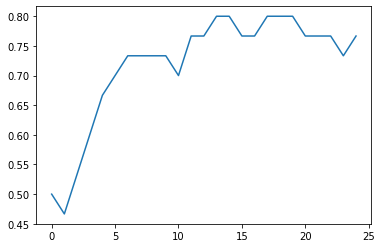

In [620]:
trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1, max_depth=5, random_state=0)
    classifier=classifier.fit(x_train,y_train)
    predictions=classifier.predict(x_test)
    accuracy[idx]=accuracy_score(y_test, predictions)

plt.cla()
plt.plot(trees, accuracy)